# Guide to Network Analysis (Part 4 - Find Closest Facilities)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-2">Problem statement</a></span></li><li><span><a href="#Define-Incidents-and-Facilities-Layer" data-toc-modified-id="Define-Incidents-and-Facilities-Layer-3">Define Incidents and Facilities Layer</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-4">Methods</a></span><ul class="toc-item"><li><span><a href="#Method-1---using-arcgis.network.ClosestFacilityLayer.solve_closest_facility" data-toc-modified-id="Method-1---using-arcgis.network.ClosestFacilityLayer.solve_closest_facility-4.1">Method 1 - using arcgis.network.ClosestFacilityLayer.solve_closest_facility</a></span><ul class="toc-item"><li><span><a href="#Creating-a-ClosestFacilityLayer" data-toc-modified-id="Creating-a-ClosestFacilityLayer-4.1.1">Creating a ClosestFacilityLayer</a></span></li><li><span><a href="#Calling-ClosestFacilityLayer.solve_closest_facility" data-toc-modified-id="Calling-ClosestFacilityLayer.solve_closest_facility-4.1.2">Calling ClosestFacilityLayer.solve_closest_facility</a></span></li><li><span><a href="#Tabularizing-the-response-from-ClosestFacilityLayer.solve_closest_facility" data-toc-modified-id="Tabularizing-the-response-from-ClosestFacilityLayer.solve_closest_facility-4.1.3">Tabularizing the response from ClosestFacilityLayer.solve_closest_facility</a></span></li><li><span><a href="#Visualizing-the-response-from-ClosestFacilityLayer.solve_closest_facility" data-toc-modified-id="Visualizing-the-response-from-ClosestFacilityLayer.solve_closest_facility-4.1.4">Visualizing the response from ClosestFacilityLayer.solve_closest_facility</a></span></li><li><span><a href="#Finding-Closest-Facility-for-different-times-of-the-day" data-toc-modified-id="Finding-Closest-Facility-for-different-times-of-the-day-4.1.5">Finding Closest Facility for different times of the day</a></span></li></ul></li><li><span><a href="#Method-2---using-arcgis.network.analysis.find_closest_facilities" data-toc-modified-id="Method-2---using-arcgis.network.analysis.find_closest_facilities-4.2">Method 2 - using arcgis.network.analysis.find_closest_facilities</a></span><ul class="toc-item"><li><span><a href="#Tabularizing-the-response-from-find_closest_facilities" data-toc-modified-id="Tabularizing-the-response-from-find_closest_facilities-4.2.1">Tabularizing the response from find_closest_facilities</a></span></li><li><span><a href="#Visualizing-the-response-from-find_closest_facilities" data-toc-modified-id="Visualizing-the-response-from-find_closest_facilities-4.2.2">Visualizing the response from find_closest_facilities</a></span></li></ul></li><li><span><a href="#Method-3---using-arcgis.features.use_proximity.find_nearest" data-toc-modified-id="Method-3---using-arcgis.features.use_proximity.find_nearest-4.3">Method 3 - using arcgis.features.use_proximity.find_nearest</a></span><ul class="toc-item"><li><span><a href="#With-output_name-specified" data-toc-modified-id="With-output_name-specified-4.3.1">With output_name specified</a></span></li><li><span><a href="#Without-output_name-specified" data-toc-modified-id="Without-output_name-specified-4.3.2">Without output_name specified</a></span></li><li><span><a href="#Tabularizing-the-response-from-find_nearest" data-toc-modified-id="Tabularizing-the-response-from-find_nearest-4.3.3">Tabularizing the response from find_nearest</a></span></li><li><span><a href="#Visualizing-the-response-from-find_nearest" data-toc-modified-id="Visualizing-the-response-from-find_nearest-4.3.4">Visualizing the response from find_nearest</a></span></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

## Introduction

Now we have learned about Network Datasets and Network Analysis Layer (NA Layer) in <a href="guide_to_network_analysis_part1.ipynb">Part 1</a>, how to find routes from one point to another, and among multiple points in <a href="guide_to_network_analysis_part2.ipynb">Part 2</a>, and hwo to generate service area in <a href="guide_to_network_analysis_part3.ipynb">Part 3</a>, let's move onto the fourth topic - how to find closest facility. Please refer to the road map below if you want to revisit the previous topics or jump to the next topic -

 - Network Dataset and Network Analysis Layer (<a href="guide_to_network_analysis_part1.ipynb">Part 1</a>) 
 - Find Routes (<a href="guide_to_network_analysis_part2.ipynb">Part 2</a>)
 - Generate Service Area (<a href="guide_to_network_analysis_part3.ipynb">Part 3</a>)
 - Find Closest Facility (You are here!)
 - Generate Origin Destination Cost Matrix (Part 5)
 - Solve Location Allocation (Part 6)
 - Vehicle Routing Problem Service (Part 7)
 - 3D Network Analysis Workflow (Part 8)

The API of `Finding Closest Facility` is useful when you needs to find out individual locations near a source feature (in this guide, we call it `incidents layer`) in a sense that the API can calculate the actual distance between each location in the incidents layer and the closest source (in the `facilities layer`). For instance, if you want to know the distance of some eagle nests from a river and what's the closest point <a href="#References">[1]</a>.

Or you can also have the API find the distance between each location (in the `incidents layer`) and several source features (in the `facilities layer`), which can be interpreted as <a href="#References">[1]</a>:
 - If you want to see which areas are near more than one source and which areas are near only one. For instance, a fast food chain might need to see which areas have many customers near several restaurants.
 - If you need to know the second or third closest source for each location. For instance, a patient might need to know the nearest and the second nearest hospitals to his/her home address.
 - If you want to compare distance to other factors. for example, customer's distance from the store would need to be weighted against the number of store visits.

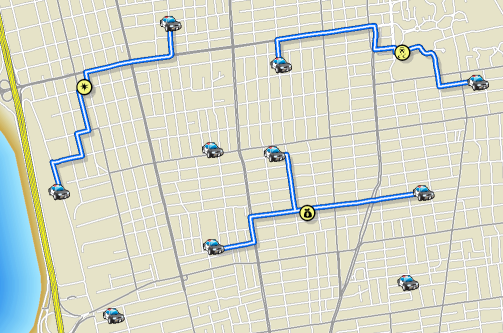

Fig 1. When a criminal incident happens, police patrol system needs to figure out which patrol vehicles are closest to the incident, in order to send the police officers over to the scene (source: <a href="#References">[2]</a>). 

This part of guide to Networking Analysis will help you measure the cost of traveling between incidents and facilities, specify how many to find and whether the direction of travel is toward or away from them, and determine which are nearest to one another, and at the end display the best routes between incidents and facilities, report their travel costs, and return driving directions <a href="#References">[2]</a>. In this part of guide, you'll be introduced to the workflow to find the closest hospital to an accident. 

Now that we have learned why finding closest facility is needed, and the basis of measuring the nearness, it is time to make your hands dirty with some real implementations!

## Problem statement

The goal of part 4 is to show how to determine which facilities are nearest to the incidents. Let's assume the user story is like this:

Jim is an operator working for Medical Emergency Response Office, and needs to schedule for emergency response vehicles to pick up patients from the location of incidents and transport to the nearest hospitals. Now given the three incidents reported in Redlands and Loma Linda, can Jim find the nearest hospitals for each of these incidents, and also provide them routes and directions?

Now that Jim's objectives are defined, we can go onto break down the problem:
 - Data: where to access the input dataset
 - Methods: what tools can be used to build the network model and perform closest facility analysis
 - Tables and maps: deliverables in which directions and routes are visualized.
 
Let's first access and/or explore the input dataset (in this case, the incidents and facilities feature class).

## Define Incidents and Facilities Layer

Finding a closest facility can be associated with a local network dataset or a network service hosted in ArcGIS Online or ArcGIS Enterprise. Here, we will be using an existing feature layer that contains hospitals derived from various sources (refer SOURCE field) for the Homeland Infrastructure Foundation-Level Data (HIFLD) database (https://gii.dhs.gov/HIFLD), which can be accessed from `esri_livingatlas`.

In [1]:
from arcgis.gis import GIS
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, use_proximity, FeatureCollection
import pandas as pd
import time
import datetime as dt
import arcgis.features.use_proximity as use_proximity

In [2]:
my_gis = GIS('https://www.arcgis.com', 'arcgis_python', 'P@ssword123')
# my_gis = GIS('https://www.arcgis.com', 'demos_deldev', 'DelDevs12')

If you have access to the hospital feature class on `livingAtlas`, then perform these three cells:

<Item title:"Hospitals" type:Feature Layer Collection owner:carolee.doughty_geoplatform>
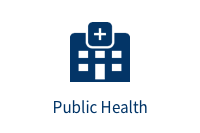

In [3]:
hospital_item = my_gis.content.get("a2817bf9632a43f5ad1c6b0c153b0fab")
hospital_item

In [21]:
hospital_fl = FeatureLayer(hospital_item.url + "/0")
hospital_fl

<FeatureLayer url:"https://services5.arcgis.com/fMBfBrOnc6OOzh7V/arcgis/rest/services/Facility/FeatureServer/0">

In [5]:
facilities = hospital_fl.query(where="County='SAN BERNARDINO' AND State='CA'", as_df=False)
facilities

<FeatureSet> 32 features

Otherwise, the alternative source is listed here:

You do not have permissions to access this resource or perform this operation.


<Item title:"Healthcare Facility, California" type:Feature Layer Collection owner:tdbuno>
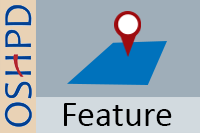

In [19]:
try:
    hospital_item = my_gis.content.get("a2817bf9632a43f5ad1c6b0c153b0fab")
    display(hospital_item)
except RuntimeError as re:
    hospital_item = my_gis.content.get("41daac7fcfc0413badf6b9a9298acdfc")
display(hospital_item)

In [23]:
hospital_fl = FeatureLayer(hospital_item.url + "/0")
try:
    facilities = hospital_fl.query(where="County='SAN BERNARDINO' AND State='CA'", as_df=False)
except RuntimeError as re:
    facilities = hospital_fl.query(where="County_Name='SAN BERNARDINO'", as_df=False)
display(facilities)


'Invalid field: County' parameter is invalid


<FeatureSet> 27 features

Now we have the `facilities layer` ready, we can go onto define the `incidents layer`. Here, we randomly picked two locations in Redlands, CA.

In [6]:
incidents_json = {
                    "features": [{"attributes": {"CurbApproach": 0,
                                                 "ID": "C100045",
                                                 "Name": "Incident at Esri"},
                                  "geometry": {"x": -117.19569523299998, "y": 34.05608640000003}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "F100086",
                                                 "Name": "Incident at APT"},
                                  "geometry": {"x": -117.20520037855628, "y": 34.04472649163186}},
                                 {"attributes": {"CurbApproach": 0,
                                                 "ID": "C100097",
                                                 "Name": "Incident at Walmart"},
                                  "geometry": {"x": -117.222253, "y": 34.065378}}],
                    "spatialReference": {"wkid": 4326, "latestWkid": 4326},
                    "geometryType": "esriGeometryPoint",
                    "fields" : [
                        {"name" : "ID", "type" : "esriFieldTypeString", "alias" : "ID", "length" : "50"},
                        {"name" : "Name", "type" : "esriFieldTypeString", "alias" : "Name", "length" : "50"},
                        {"name" : "CurbApproach", "type" : "esriFieldTypeInteger", "alias" : "CurbApproach"}
                    ]
                }
incidents = FeatureSet.from_dict(incidents_json)

Let's have the two layers visualized in the map view.


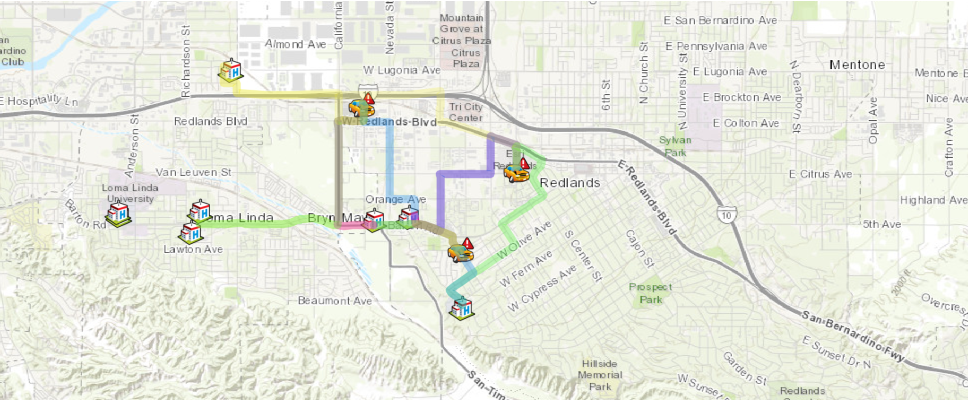

In [28]:
map1 = my_gis.map('Redlands, CA', zoomlevel=12)
map1

In [7]:
hospital_symbol = {"type":"esriPMS",
                   "url":"http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png",
                   "contentType": "image/png", "width":20, "height":20}

map1.draw(facilities, symbol=hospital_symbol)

In [8]:
traffic_accident_symbol = {"type":"esriPMS",
                           "url":"http://static.arcgis.com/images/Symbols/Transportation/TrafficAccident.png",
                           "contentType": "image/png", "width":20, "height":20}

map1.draw(incidents, symbol=traffic_accident_symbol)

## Methods

### Method 1 - using arcgis.network.ClosestFacilityLayer.solve_closest_facility

The closest facility solver provides functionality for finding out the closest locations to a particular input point. This solver would be useful in cases when you have an incident and need to find the closest facility or need to get information on the travel time and the distance to each of the facilities from an incident point for reporting purposes <a href="#References">[3]</a>.

A typical workflow of solving a Closest Facilities problem is to (a) Creates a Closest Facility network analysis layer, (b) sets the analysis properties, and (c) solves the analysis. The pre-requisite is to have a Closest Facility geoprocessing service already set up on the web. 

#### Creating a ClosestFacilityLayer

In [7]:
username = "portaladmin"
password = "esri.agp"
gis = GIS("https://datascienceqa.esri.com/portal", username, password)

In [8]:
analysis_url = gis.properties.helperServices.closestFacility.url
analysis_url

'https://datascienceqa.esri.com/portal/sharing/servers/40eceda7894b422097e54bc52273ab3b/rest/services/World/ClosestFacility/NAServer/ClosestFacility_World'

In [9]:
# Create a ClosestFacilityLayer object using this URL
cf_layer = network.ClosestFacilityLayer(analysis_url, gis=gis)

#### Calling ClosestFacilityLayer.solve_closest_facility

In [16]:
result = cf_layer.solve_closest_facility(incidents=incidents,
                                         facilities=facilities,
                                         default_target_facility_count=4,
                                         return_facilities=True,
                                         impedance_attribute_name='TravelTime',
                                         accumulate_attribute_names=['Kilometers','TravelTime'])

#### Tabularizing the response from ClosestFacilityLayer.solve_closest_facility

In [18]:
line_feat_list = []
for line_dict in result['routes']['features']:
    f1 = Feature(line_dict['geometry'], line_dict['attributes'])
    line_feat_list.append(f1)

In [19]:
routes_fset = FeatureSet(line_feat_list, 
                         geometry_type=result['routes']['geometryType'],
                         spatial_reference= result['routes']['spatialReference'])

In [20]:
routes_fset.sdf

EndTime EndTimeUTC  FacilityCurbApproach  FacilityID  FacilityRank  \
0     None       None                     2          23             1   
1     None       None                     1          24             2   
2     None       None                     1          26             3   
3     None       None                     1          18             4   
4     None       None                     2          23             1   
5     None       None                     1          26             2   
6     None       None                     1          24             3   
7     None       None                     1          17             4   
8     None       None                     2          24             1   
9     None       None                     1          23             2   
10    None       None                     1          17             3   
11    None       None                     1          18             4   

    IncidentCurbApproach  IncidentID  \
0                      1           1   
1                      1           1   
2                      1           1   
3                      1           1   
4                      1           2   
5                      1           2   
6                      1           2   
7                      1           2   
8                      1           3   
9                      1           3   
10                     1           3   
11                     1           3   

                                                 Name  ObjectID  \
0   Incident at Esri - LOMA LINDA UNIVERSITY BEHAV...         1   
1   Incident at Esri - LOMA LINDA UNIVERSITY HEART...         2   
2      Incident at Esri - REDLANDS COMMUNITY HOSPITAL         3   
3   Incident at Esri - TOTALLY KIDS REHABILITATION...         4   
4   Incident at APT - LOMA LINDA UNIVERSITY BEHAVI...         5   
5       Incident at APT - REDLANDS COMMUNITY HOSPITAL         6   
6   Incident at APT - LOMA LINDA UNIVERSITY HEART ...         7   
7   Incident at APT - VA LOMA LINDA HEALTHCARE SYSTEM         8   
8   Incident at Walmart - LOMA LINDA UNIVERSITY HE...         9   
9   Incident at Walmart - LOMA LINDA UNIVERSITY BE...        10   
10  Incident at Walmart - VA LOMA LINDA HEALTHCARE...        11   
11  Incident at Walmart - TOTALLY KIDS REHABILITAT...        12   

                                                SHAPE  ...  StartTime  \
0   {'paths': [[[-117.19569999999999, 34.056490000...  ...       None   
1   {'paths': [[[-117.19569999999999, 34.056490000...  ...       None   
2   {'paths': [[[-117.19569999999999, 34.056490000...  ...       None   
3   {'paths': [[[-117.19569999999999, 34.056490000...  ...       None   
4   {'paths': [[[-117.20519991199996, 34.044698034...  ...       None   
5   {'paths': [[[-117.20519991199996, 34.044698034...  ...       None   
6   {'paths': [[[-117.20519991199996, 34.044698034...  ...       None   
7   {'paths': [[[-117.20519991199996, 34.044698034...  ...       None   
8   {'paths': [[[-117.22210885999999, 34.065533227...  ...       None   
9   {'paths': [[[-117.22210885999999, 34.065533227...  ...       None   
10  {'paths': [[[-117.22210885999999, 34.065533227...  ...       None   
11  {'paths': [[[-117.22210885999999, 34.065533227...  ...       None   

   StartTimeUTC Total_Kilometers  Total_Miles  Total_Minutes Total_TimeAt1KPH  \
0          None         3.613900     2.245573           None             None   
1          None         4.152194     2.580054           None             None   
2          None         4.284827     2.662468           None             None   
3          None         6.035444     3.750251           None             None   
4          None         1.044827     0.649225           None             None   
5          None         1.301393     0.808648           None             None   
6          None         1.583121     0.983706           None             None   
7          None         4.368830     2.714665           None  

In [21]:
df1 = routes_fset.sdf
df1[['Name','Total_Miles','Total_TravelTime']]

Name  Total_Miles  \
0   Incident at Esri - LOMA LINDA UNIVERSITY BEHAV...     2.245573   
1   Incident at Esri - LOMA LINDA UNIVERSITY HEART...     2.580054   
2      Incident at Esri - REDLANDS COMMUNITY HOSPITAL     2.662468   
3   Incident at Esri - TOTALLY KIDS REHABILITATION...     3.750251   
4   Incident at APT - LOMA LINDA UNIVERSITY BEHAVI...     0.649225   
5       Incident at APT - REDLANDS COMMUNITY HOSPITAL     0.808648   
6   Incident at APT - LOMA LINDA UNIVERSITY HEART ...     0.983706   
7   Incident at APT - VA LOMA LINDA HEALTHCARE SYSTEM     2.714665   
8   Incident at Walmart - LOMA LINDA UNIVERSITY HE...     1.819083   
9   Incident at Walmart - LOMA LINDA UNIVERSITY BE...     1.608666   
10  Incident at Walmart - VA LOMA LINDA HEALTHCARE...     2.842719   
11  Incident at Walmart - TOTALLY KIDS REHABILITAT...     2.134565   

    Total_TravelTime  
0           6.057727  
1           6.571467  
2           7.168803  
3           9.228218  
4           1.806050  
5           2.310310  
6           2.319791  
7           5.410007  
8           4.511802  
9           5.579654  
10          6.314367  
11          6.694531

#### Visualizing the response from ClosestFacilityLayer.solve_closest_facility

In [12]:
""" Define a list of colors/styles for routes;
    alternatively, use "'type': 'simple-line', 'style': 'solid'"
"""
allocation_line_symbol = [{'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [237, 17, 189, 100], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [30, 139, 235, 90], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [66, 240, 43, 80], 'width': 6},
                          {'type': 'esriSLS', 'style': 'esriSLSSolid',
                            'color': [240, 234, 67, 70], 'width': 6}]

names_list = ["Incident at Esri",
              "Incident at APT",
              "Incident at Walmart"]

In [25]:
map1.clear_graphics()
map1.draw(routes_fset, symbol = allocation_line_symbol[0])

In [26]:
map1.clear_graphics()
map1.draw(facilities, symbol=hospital_symbol)
map1.draw(incidents, symbol=traffic_accident_symbol)

count1 = 0
count2 = 0

for route in routes_fset.features:
    
    #get the name
    name = route.attributes['Name']
    #get the color
    fill_symbol=allocation_line_symbol[count1%4]
    
    if names_list[0] in name:
        count1+=1
    else:
        fill_symbol=allocation_line_symbol[count2%4]
        count2+=1

    #set popup
    popup={"title": "Closest Facility {}".format(route.attributes['Name']), 
           "content": "{} minutes".format(route.attributes['Total_TravelTime'])}
    
    map1.draw(route.geometry, symbol=fill_symbol, popup=popup)
    time.sleep(2)

In [27]:
item_properties = {
    "title": "Closest Facility of hospitals in San Bernadino County from incidents",
    "tags" : "Closest Facility",
    "snippet": " Closest Facility of hospitals in San Bernadino County from incidents",
    "description": "a web map of Closest Facility of hospitals in San Bernadino County from incidents",
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer",
    "extent" : map1.extent
}

item = map1.save(item_properties)
item

<Item title:"Closest Facility of hospitals in San Bernadino County from incidents" type:Web Map owner:arcgis_python>

#### Finding Closest Facility for different times of the day

In [50]:
times = [dt.datetime(2019, 9, 19, h).timestamp() * 1000 
         for h in [6, 10, 14, 18, 22]]

# incident location (Pick one from Loma Linda) 34.059404, -117.226185
reported_location = '-117.203635, 34.076394'

#loop through each time of the day and compute the service area
cf_results = []
for daytime in times:
    result = cf_layer.solve_closest_facility(incidents=reported_location,
                                             facilities=facilities,
                                             default_target_facility_count=5,
                                             return_facilities=True,
                                             impedance_attribute_name='TravelTime',
                                             accumulate_attribute_names=['Kilometers','TravelTime'],
                                             time_of_day=daytime, time_of_day_is_utc=False)
    cf_results.append(result)

In [51]:
Loma_linda_fset_list=[]
for result in cf_results:
    poly_feat_list = []
    for polygon_dict in result['routes']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    cf_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['routes']['geometryType'],
                         spatial_reference= result['routes']['spatialReference'])
    
    Loma_linda_fset_list.append(cf_fset)


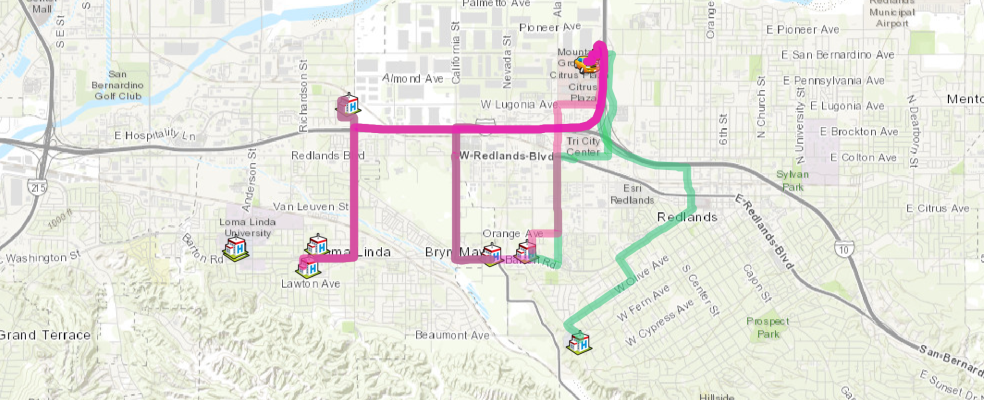

In [55]:
map2= my_gis.map("Loma Linda, CA")
map2

In [53]:
""" Convert the string representation of reported location to a list representation;
    If needed, reverse the list as well.
"""
def convert(string, reverse=True): 
    li = list(string.split(",")) 
    li = [float(i) for i in li] 
    if reverse:
        li.reverse()
    return li 

reported_location_list = convert(reported_location)
reported_location_list

[34.076394, -117.203635]

In [54]:
map2.clear_graphics()
map2.draw(facilities, symbol=hospital_symbol)
map2.draw(reported_location_list, symbol=traffic_accident_symbol)

times = ['6 am', '10 am', '2 pm', '6 pm', '10 pm']
j=0
time.sleep(2)

for fset in Loma_linda_fset_list:
    print(times[j])
    map2.draw(fset, symbol = allocation_line_symbol[j%4])
    j+=1
    time.sleep(1)

6 am
10 am
2 pm
6 pm
10 pm


### Method 2 - using arcgis.network.analysis.find_closest_facilities

Set `save_output_network_analysis_layer` to True if you want to output the resulting NA layer as Layer file.

In [10]:
""" when gis is set to AGO, error "AttributeError: 'ToolOutput' object has no attribute 'result'"
"""
result1 = network.analysis.find_closest_facilities(incidents=incidents, facilities=facilities, 
                                                   cutoff=10, time_of_day=dt.datetime.now(), 
                                                   number_of_facilities_to_find=4,
                                                   save_output_network_analysis_layer=True,
                                                   gis=gis)

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


Now, check if the tool is run successfully, and what are types of the elements in the returned result set, and also get the output network analysis layer's url.

In [12]:
result1.solve_succeeded

True

In [14]:
type(result1.output_routes),type(result1.output_closest_facilities)

(arcgis.features.feature.FeatureSet, arcgis.features.feature.FeatureSet)

In [15]:
result1.output_network_analysis_layer.url

'https://logistics.arcgis.com/arcgis/rest/directories/arcgisjobs/world/closestfacility_gpserver/j9d7ee42a2d304c32b4990a366d73d2e5/scratch/_ags_gpna43e74080e4a8444492fafdf9380a0ab6.lyr'

#### Tabularizing the response from find_closest_facilities

In [15]:
result1.output_routes.sdf

EndTime                    EndTimeUTC  \
0  2019-09-19 07:05:18.973999977 2019-09-19 14:05:18.973999977   
1  2019-09-19 07:05:51.482000113 2019-09-19 14:05:51.482000113   
2  2019-09-19 07:06:26.105000019 2019-09-19 14:06:26.105000019   
3  2019-09-19 07:08:17.104000092 2019-09-19 14:08:17.104000092   
4  2019-09-19 07:01:31.595999956 2019-09-19 14:01:31.595999956   
5  2019-09-19 07:02:04.102999926 2019-09-19 14:02:04.102999926   
6  2019-09-19 07:02:05.572000027 2019-09-19 14:02:05.572000027   
7  2019-09-19 07:04:29.726000071 2019-09-19 14:04:29.726000071   
8  2019-09-19 07:04:07.447999954 2019-09-19 14:04:07.447999954   
9  2019-09-19 07:04:48.415999889 2019-09-19 14:04:48.415999889   
10 2019-09-19 07:06:09.581000090 2019-09-19 14:06:09.581000090   
11 2019-09-19 07:06:23.921999931 2019-09-19 14:06:23.921999931   

    FacilityCurbApproach  FacilityID  FacilityOID  FacilityRank  \
0                      2  0025792373         9867             1   
1                      1  0025892373         9868             2   
2                      1  0037092373         9870             3   
3                      1  0003492357         9834             4   
4                      2  0025792373         9867             1   
5                      1  0025892373         9868             2   
6                      1  0037092373         9870             3   
7                      1  0003492357         9834             4   
8                      2  0025892373         9868             1   
9                      1  0025792373         9867             2   
10                     1  0003492357         9834             3   
11                     1  0059192354         9845             4   

    IncidentCurbApproach IncidentID  IncidentOID  \
0                      1    C100045            1   
1                      1    C100045            1   
2                      1    C100045            1   
3                      1    C100045            1   
4                      1    F100086            2   
5                      1    F100086            2   
6                      1    F100086            2   
7                      1    F100086            2   
8                      1    C100097            3   
9                      1    C100097            3   
10                     1    C100097            3   
11                     1    C100097            3   

                                                 Name  ObjectID  \
0   Incident at Esri - LOMA LINDA UNIVERSITY BEHAV...         1   
1   Incident at Esri - LOMA LINDA UNIVERSITY HEART...         2   
2      Incident at Esri - REDLANDS COMMUNITY HOSPITAL         3   
3   Incident at Esri - VA LOMA LINDA HEALTHCARE SY...         4   
4   Incident at APT - LOMA LINDA UNIVERSITY BEHAVI...         5   
5   Incident at APT - LOMA LINDA UNIVERSITY HEART ...         6   
6       Incident at APT - REDLANDS COMMUNITY HOSPITAL         7   
7   Incident at APT - VA LOMA LINDA HEALTHCARE SYSTEM         8   
8   Incident at Walmart - LOMA LINDA UNIVERSITY HE...         9   
9   Incident at Walmart - LOMA LINDA UNIVERSITY BE...        10   
10  Incident at Walmart - VA LOMA LINDA HEALTHCARE...        11   
11  Incident at Walmart - TOTALLY KIDS REHABILITAT...        12   

                                                SHAPE  Shape_Length  \
0   {'paths': [[[-117.19569999999999, 34.056490000...      0.038900   
1   {'paths': [[[-117.19569999999999, 34.056490000...      0.044952   
2   {'paths': [[[-117.19569999999999, 34.056490000...      0.043208   
3   {'paths': [[[-117.19569999999999, 34.056490000...      0.075007   
4   {'paths': [[[-117.20519991199996, 34.044698034...      0.010638   
5   {'paths': [[[-117.20519991199996, 34.044698034...      0.016690   
6   {'paths': [[[-117.20519991199996, 34.044698034...      0.012996   
7   {'paths': [[[-117.20519991199996, 34.044698034...      0.046745   
8   {'paths': [[[-117.22210885999999, 34.065533227...      0.018974   
9   {'paths': [[[-117.2221088599999

In [16]:
""" to create tables with valid information
"""
df4 = result1.output_routes.sdf
start_times = pd.to_datetime(df4["StartTime"], unit="ms")
end_times = pd.to_datetime(df4["EndTime"], unit="ms")
df4["StartTime"] = start_times.apply(lambda x: x.strftime("%H:%M:%S"))
df4["EndTime"] = end_times.apply(lambda x: x.strftime("%H:%M:%S"))
df4[["Name", "StartTime", "EndTime", "FacilityID", "Total_Kilometers", "Total_Minutes"]]

Name StartTime   EndTime  \
0   Incident at Esri - LOMA LINDA UNIVERSITY BEHAV...  07:00:00  07:05:18   
1   Incident at Esri - LOMA LINDA UNIVERSITY HEART...  07:00:00  07:05:51   
2      Incident at Esri - REDLANDS COMMUNITY HOSPITAL  07:00:00  07:06:26   
3   Incident at Esri - VA LOMA LINDA HEALTHCARE SY...  07:00:00  07:08:17   
4   Incident at APT - LOMA LINDA UNIVERSITY BEHAVI...  07:00:00  07:01:31   
5   Incident at APT - LOMA LINDA UNIVERSITY HEART ...  07:00:00  07:02:04   
6       Incident at APT - REDLANDS COMMUNITY HOSPITAL  07:00:00  07:02:05   
7   Incident at APT - VA LOMA LINDA HEALTHCARE SYSTEM  07:00:00  07:04:29   
8   Incident at Walmart - LOMA LINDA UNIVERSITY HE...  07:00:00  07:04:07   
9   Incident at Walmart - LOMA LINDA UNIVERSITY BE...  07:00:00  07:04:48   
10  Incident at Walmart - VA LOMA LINDA HEALTHCARE...  07:00:00  07:06:09   
11  Incident at Walmart - TOTALLY KIDS REHABILITAT...  07:00:00  07:06:23   

    FacilityID  Total_Kilometers  Total_Minutes  
0   0025792373          3.830778       5.316235  
1   0025892373          4.369072       5.858028  
2   0037092373          4.317186       6.435084  
3   0003492357          7.154781       8.285069  
4   0025792373          1.044827       1.526595  
5   0025892373          1.583121       2.068388  
6   0037092373          1.301393       2.092875  
7   0003492357          4.368830       4.495430  
8   0025892373          2.070950       4.124131  
9   0025792373          2.588897       4.806936  
10  0003492357          4.574912       6.159686  
11  0059192354          3.435250       6.398695

#### Visualizing the response from find_closest_facilities


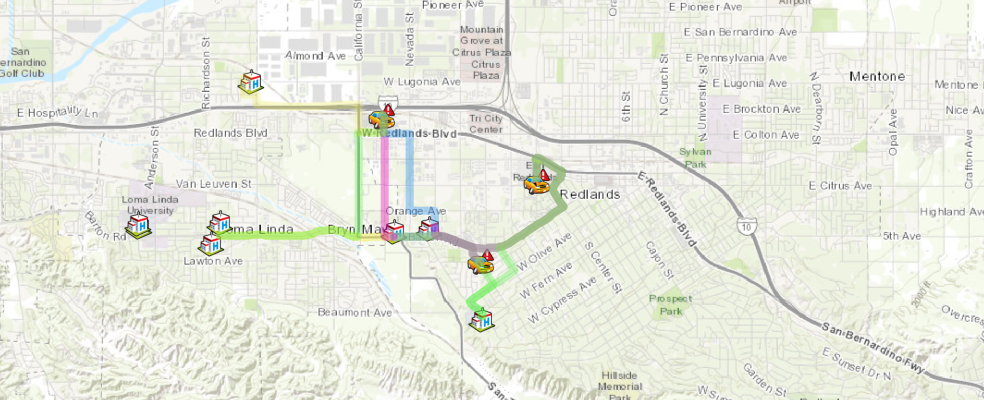

In [62]:
map3 = my_gis.map('Redlands, CA', zoomlevel=12)
map3

In [18]:
map3.clear_graphics()
map3.zoom = 13

count1 = 0
count2 = 0

for route in result1.output_routes.features:
    
    #get the name
    name = route.attributes['Name']
    #get the color
    fill_symbol=allocation_line_symbol[count1%4]
    
    if names_list[0] in name:
        count1+=1
    else:
        fill_symbol=allocation_line_symbol[count2%4]
        count2+=1

    #set popup
    popup={"title": "Closest Facility {}".format(route.attributes['Name']), 
           "content": "{} minutes".format(route.attributes['Total_Minutes'])}
    
    map3.draw(route.geometry, symbol=fill_symbol, popup=popup, attributes={"title":route.attributes['Name']})
    time.sleep(2)
    
map3.draw(facilities, symbol=hospital_symbol, attributes={"title":"Hospital Facility"})
map3.draw(incidents, symbol=traffic_accident_symbol, attributes={"title":"Incident Location"})

In [19]:
item_properties["title"] += " (2)"
item_properties["extent"] = map3.extent

item = map3.save(item_properties)
item

<Item title:"Closest Facility of hospitals in San Bernadino County from incidents (2)" type:Web Map owner:portaladmin>

### Method 3 - using arcgis.features.use_proximity.find_nearest

In [10]:
car_mode = [i for i in cf_layer.retrieve_travel_modes()['supportedTravelModes'] 
            if i['name'] == 'Driving Time'][0]

In [11]:
incidents_fc = FeatureCollection.from_featureset(incidents)
facilities_fc = FeatureCollection.from_featureset(facilities)
incidents_fc, facilities_fc

(<FeatureCollection>, <FeatureCollection>)

In [12]:
type(incidents_fc.properties["layers"][0])

dict

#### With output_name specified

<Item title:"accidents_location" type:Feature Collection owner:arcgis_python>
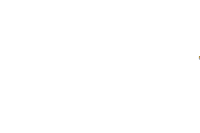

In [20]:
accidents_item=my_gis.content.search("accidents_location")[1]
accidents_item

In [13]:
incidents_fc.properties["layers"][0]['layerDefinition'] = {
                    "geometryType": "esriGeometryPoint",
                    "objectIdField": "OBJECTID",
                    "fields": [
                            {
                                "alias": "OBJECTID",
                                "name": "OBJECTID",
                                "type": "esriFieldTypeOID",
                                "editable": False
                            }
                        ]
                    }

In [15]:
""" Note here, using incidents_fc without the "layerDefinition" conversion does not work,
    using the 'accidents_item' does not work
"""
result2 = use_proximity.find_nearest(incidents_fc, hospital_item, measurement_type=car_mode,
                                     context={'outSR': {"wkid": 4326}},
                                     search_cutoff=10,
                                     output_name="Find nearest hospital(s) 2",
                                     gis=my_gis)

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


In [4]:
result2

<Item title:"Find nearest hospital(s) 2" type:Feature Layer Collection owner:arcgis_python>

The first sublayer of `result2` is the nearest facilities, and the second sublayer is the route.

In [10]:
closest_facility_sublayer = FeatureLayer.fromitem(result2, layer_id=0)
closest_facility_sublayer.url

'https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Find nearest hospital(s) 2/FeatureServer/0'

In [12]:
cf_df = closest_facility_sublayer.query(where='1=1', as_df=True)
cf_df.tail()

COUNTY_CODE     COUNTY_NAME            DBA_ADDRESS1    DBA_CITY  \
1           71  San Bernardino       11234 Anderson St  Loma Linda   
2           71  San Bernardino      350 Terracina Blvd    Redlands   
3           71  San Bernardino         26780 Barton Rd    Redlands   
4           71  San Bernardino  1720 Mountain View Ave  Loma Linda   
5           71  San Bernardino       11234 Anderson St  Loma Linda   

  DBA_ZIP_CODE ER_SERVICE_LEVEL_DESC  \
1        92354     Emergency - Basic   
2        92373     Emergency - Basic   
3        92373                         
4        92354                         
5        92354                         

                                       FACILITY_NAME FACILITY_STATUS_DATE  \
1               LOMA LINDA UNIVERSITY MEDICAL CENTER  1946-01-01 12:00:00   
2                        REDLANDS COMMUNITY HOSPITAL  1946-01-01 12:00:00   
3  LOMA LINDA UNIVERSITY HEART AND SURGICAL HOSPITAL  2009-01-02 12:00:00   
4               TOTALLY KIDS REHABILITATION HOSPITAL  2014-06-20 12:00:00   
5          LOMA LINDA UNIVERSITY CHILDREN'S HOSPITAL  2014-11-16 12:00:00   

  FACILITY_STATUS_DESC                                 HYPERLINK_TO_ATLAS  \
1                 Open  http://gis.oshpd.ca.gov/atlas/places/facility/...   
2                 Open  http://gis.oshpd.ca.gov/atlas/places/facility/...   
3                 Open  http://gis.oshpd.ca.gov/atlas/places/facility/...   
4                 Open  http://gis.oshpd.ca.gov/atlas/places/facility/...   
5                 Open  http://gis.oshpd.ca.gov/atlas/places/facility/...   

    LATITUDE             LICENSE_CAT_DESC LICENSE_TYPE_DESC   LONGITUDE  \
1  34.051640  General Acute Care Hospital          Hospital -117.261460   
2  34.036990  General Acute Care Hospital          Hospital -117.204400   
3  34.048272  General Acute Care Hospital          Hospital -117.221174   
4  34.069710  General Acute Care Hospital          Hospital -117.243710   
5  34.049150  General Acute Care Hospital          Hospital -117.261150   

   OBJECTID  ORIG_FID   OSHPD_ID  \
1         2       344  106361246   
2         3       347  106361308   
3         4       360  106364268   
4         5       363  106364451   
5         6       364  106364502   

                                               SHAPE  TOTAL_NUMBER_BEDS  
1  {'x': -13053484.6853, 'y': 4035737.4617, 'spat...                371  
2  {'x': -13047132.7963, 'y': 4033769.297200002, ...                229  
3  {'x': -13049000.0692, 'y': 4035284.901299998, ...                 28  
4  {'x': -13051508.7645, 'y': 4038165.556400001, ...                 81  
5  {'x': -13053450.1763, 'y': 4035402.9170999974,...                343


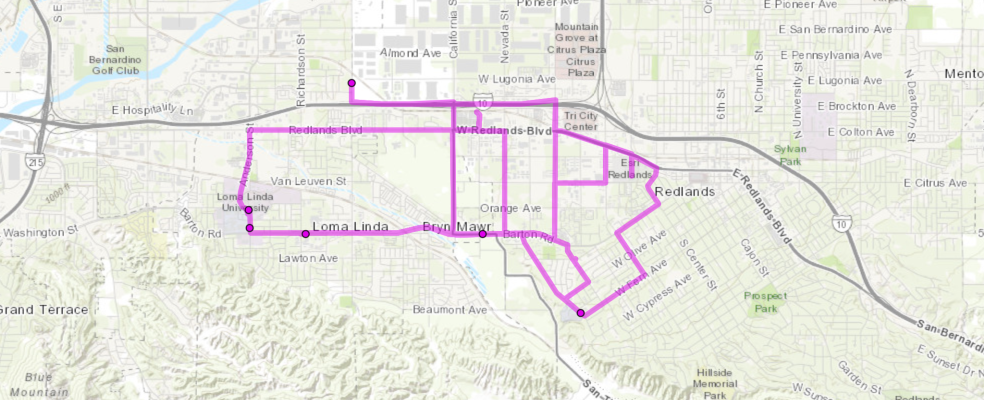

In [24]:
map4a = my_gis.map('Redlands, CA', zoomlevel=12)
map4a

In [17]:
map4a.add_layer(result2)

#### Without output_name specified

In [34]:
""" https://analysis7.arcgis.com/arcgis/rest/services/tasks/GPServer/FindNearest/submitJob
"""
result2 = use_proximity.find_nearest(incidents_fc, facilities_fc, measurement_type=car_mode,
                                     context={'outSR': {"wkid": 4326}},
                                     search_cutoff=10)

Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


#### Tabularizing the response from find_nearest

In [36]:
result2

{'nearest_layer': <FeatureCollection>,
 'connecting_lines_layer': <FeatureCollection>}

In [38]:
df5 = pd.DataFrame.from_records([i.attributes for i in 
                                result2["connecting_lines_layer"].query()])
df5 = df5.drop(["EndTime", "EndTimeUTC", "RouteLayerItemID", "To_TRAUMA", "To_ZIP4", "RouteLayerItemURL", "StartTime", \
                "StartTimeUTC", "To_ALT_NAME"] , axis='columns')

df5[['RouteName', 'Total_Miles', 'Total_Minutes']]

RouteName  Total_Miles  \
0   Incident at Esri - LOMA LINDA UNIVERSITY BEHAV...     2.245569   
1   Incident at Esri - LOMA LINDA UNIVERSITY HEART...     2.580049   
2      Incident at Esri - REDLANDS COMMUNITY HOSPITAL     2.662463   
3   Incident at Esri - TOTALLY KIDS REHABILITATION...     3.750243   
4   Incident at Esri - VA LOMA LINDA HEALTHCARE SY...     4.311005   
5   Incident at APT - LOMA LINDA UNIVERSITY BEHAVI...     0.649224   
6       Incident at APT - REDLANDS COMMUNITY HOSPITAL     0.808646   
7   Incident at APT - LOMA LINDA UNIVERSITY HEART ...     0.983704   
8   Incident at APT - VA LOMA LINDA HEALTHCARE SYSTEM     2.714660   
9   Incident at APT - LOMA LINDA UNIV. MED. CENTER...     2.928432   
10  Incident at APT - LOMA LINDA UNIVERSITY MEDICA...     3.572490   
11  Incident at APT - LOMA LINDA UNIVERSITY CHILDR...     3.763812   
12  Incident at APT - TOTALLY KIDS REHABILITATION ...     4.129384   
13  Incident at Walmart - LOMA LINDA UNIVERSITY HE...     1.819079   
14  Incident at Walmart - LOMA LINDA UNIVERSITY BE...     1.608663   
15  Incident at Walmart - VA LOMA LINDA HEALTHCARE...     2.842713   
16  Incident at Walmart - TOTALLY KIDS REHABILITAT...     2.134561   
17  Incident at Walmart - LOMA LINDA UNIV. MED. CE...     3.056485   
18  Incident at Walmart - REDLANDS COMMUNITY HOSPITAL     2.606636   
19  Incident at Walmart - LOMA LINDA UNIVERSITY ME...     3.700543   
20  Incident at Walmart - LOMA LINDA UNIVERSITY CH...     3.891865   

    Total_Minutes  
0        6.057727  
1        6.571467  
2        7.168803  
3        9.228218  
4        9.661683  
5        1.806050  
6        2.310310  
7        2.319791  
8        5.410007  
9        6.010302  
10       7.970422  
11       8.236393  
12       9.550908  
13       4.511802  
14       5.579654  
15       6.314367  
16       6.694531  
17       6.914661  
18       7.195558  
19       8.874782  
20       9.140753

#### Visualizing the response from find_nearest


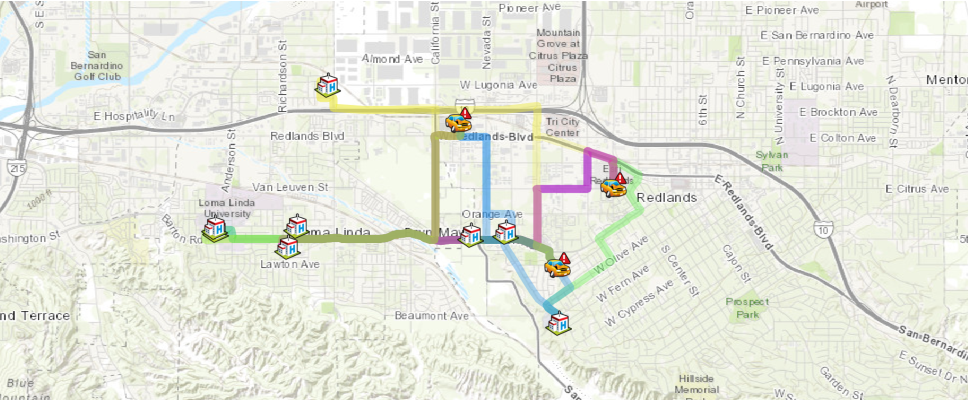

In [43]:
map4 = my_gis.map('Redlands, CA', zoomlevel=12)
map4

The methods below - `to_Json` translates a PropertyMap object to json, `remove_newline` remove the newline and extra spaces from the json string, and `loads_Json` once again translates the json string to JSON structure.

In [41]:
map4.clear_graphics()

count1 = 0
count2 = 0

for route in result2["connecting_lines_layer"].query():
    
    #get the name
    name = route.attributes['RouteName']
    #get the color
    fill_symbol=allocation_line_symbol[count1%4]
    
    if names_list[0] in name:
        count1+=1
    else:
        fill_symbol=allocation_line_symbol[count2%4]
        count2+=1

    #set popup
    popup={"title": "Closest Facility {}".format(route.attributes['RouteName']), 
           "content": "{} minutes".format(route.attributes['Total_Minutes'])}
    
    map4.draw(route.geometry, symbol=fill_symbol, popup=popup, attributes={"title":route.attributes['RouteName']})
    time.sleep(2)
    
map4.draw(facilities, symbol=hospital_symbol, attributes={"title":"Hospital Facility"})
map4.draw(incidents, symbol=traffic_accident_symbol, attributes={"title":"Incident location"})

In [42]:
item_properties["title"] = "Closest Facility of hospitals in San Bernadino County from incidents (3) "
item_properties["extent"] = map4.extent

item = map4.save(item_properties)
item

<Item title:"Closest Facility of hospitals in San Bernadino County from incidents (3) " type:Web Map owner:portaladmin>

## References

[1] Andy Mitchell, "The ESRI Guide to GIS Analysis, Volume 1: Geographic patterns & relationships", Esri Press, August 1999

[2] "Closest Facility Analysis", https://desktop.arcgis.com/en/arcmap/latest/extensions/network-analyst/closest-facility.htm, accessed on 09/16/2019

[3] "Find hospitals closest to an incident", https://developers.arcgis.com/python/sample-notebooks/finding-hospitals-closest-to-an-incident/, accessed on 09/16/2019